In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
data = pd.read_csv('card transactions.csv', parse_dates = ['Date'])

In [3]:
data.shape

(96753, 10)

In [4]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [5]:
data.head(10)

Recnum     Cardnum       Date       Merchnum        Merch description  \
0       1  5142190439 2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
1       2  5142183973 2006-01-01    61003026333  SERVICE MERCHANDISE #81   
2       3  5142131721 2006-01-01  4503082993600        OFFICE DEPOT #191   
3       4  5142148452 2006-01-01  5509006296254   FEDEX SHP 12/28/09 AB#   
4       5  5142190439 2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
5       6  5142149874 2006-01-01  5509006296254   FEDEX SHP 12/22/09 AB#   
6       7  5142189277 2006-01-01  5509006296254   FEDEX SHP 12/28/09 AB#   
7       8  5142191182 2006-01-01  6098208200062    MIAMI COMPUTER SUPPLY   
8       9  5142258629 2006-01-01   602608969534           FISHER SCI ATL   
9      10  5142190439 2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   

  Merch state  Merch zip Transtype  Amount  Fraud  
0          TN    38118.0         P    3.62      0  
1          MA     1803.0         P   31.42      0  
2          MD    20706.0         P  178.49      0  
3          TN    38118.0         P    3.62      0  
4          TN    38118.0         P    3.62      0  
5          TN    38118.0         P    3.67      0  
6          TN    38118.0         P    3.62      0  
7          OH    45429.0         P  230.32      0  
8          GA    30091.0         P   62.11      0  
9          TN    38118.0         P    3.62      0

In [6]:
data.count()

Recnum               96753
Cardnum              96753
Date                 96753
Merchnum             93378
Merch description    96753
Merch state          95558
Merch zip            92097
Transtype            96753
Amount               96753
Fraud                96753
dtype: int64

In [7]:
plt.rcParams.update({'figure.figsize':(12,6)})
plt.rcParams.update({'font.size':15})

## Data Cleaning

In [8]:
data['Cardnum']=data['Cardnum'].astype('str')
data['Merchnum']=np.where((data['Merchnum']=='NaN') | (data['Merchnum']=='0'),np.nan,data['Merchnum'])
data['Merch zip']=data['Merch zip'].fillna(0).apply(lambda x:int(x))
data['Merch zip']=data['Merch zip'].apply(lambda x:str(x))
data['Merch zip']=np.where(data['Merch zip']=='0',np.nan,data['Merch zip'])

In [9]:
data = data.loc[data['Transtype'] == 'P']

In [10]:
data = data.loc[data['Amount'] != data['Amount'].max()]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  object        
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           93146 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        95377 non-null  object        
 6   Merch zip          92097 non-null  object        
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 8.1+ MB


### Fill in Merchnum

In [12]:
merchdes_merchnum = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_merchnum :
        merchdes_merchnum[merchdes] = data.loc[index, 'Merchnum']

# fill in by mapping with Merch description
data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchdes_merchnum))

# assign unknown for adjustments transactions
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  object        
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           94126 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        95377 non-null  object        
 6   Merch zip          92097 non-null  object        
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 10.1+ MB


### Fill in Merch state

In [14]:
# dict for mapping
zip_state = {}
for index, zip5 in data[data['Merch zip'].notnull()]['Merch zip'].items():
    if zip5 not in zip_state:
        zip_state[zip5] = data.loc[index, 'Merch state']
        
zip_state['00926'] = 'PR'
zip_state['00929'] = 'PR'
zip_state['00934'] = 'PR'
zip_state['00902'] = 'PR'
zip_state['00738'] = 'PR'
zip_state['90805'] = 'CA'
zip_state['76302'] = 'TX'
zip_state['00914'] = 'PR'
zip_state['95461'] = 'CA'
zip_state['00680'] = 'PR'
zip_state['00623'] = 'PR'
zip_state['00726'] = 'PR'
zip_state['00936'] = 'PR'
zip_state['12108'] = 'NY'
zip_state['00791'] = 'PR'
zip_state['00907'] = 'PR'
zip_state['00922'] = 'PR'
zip_state['00920'] = 'PR'
zip_state['00801'] = 'VI'
zip_state['31040'] = 'GA'
zip_state['41160'] = 'KY'
zip_state['00681'] = 'PR'

merchnum_state = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_state :
        merchnum_state [merchnum] = data.loc[index, 'Merch state']

merchdes_state = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_state :
        merchdes_state [merchdes] = data.loc[index, 'Merch state']

# fill in by mapping with zip, merchnum and merch description
data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_state))
data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
data['Merch state'] = data['Merch state'].fillna(data['Merch description'].map(merchdes_state))

# assign unknown for adjustments transactions
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  object        
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           94126 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96062 non-null  object        
 6   Merch zip          92097 non-null  object        
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 10.1+ MB


### Fill in Merch zip

In [16]:
merchnum_zip = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_zip :
        merchnum_zip [merchnum] = data.loc[index, 'Merch zip']

merchdes_zip = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_zip :
        merchdes_zip [merchdes] = data.loc[index, 'Merch zip']

# fill in by mapping with merchnum and merch description
data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip))
data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))

# assign unknown for adjustments transactions
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  object        
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           94126 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96062 non-null  object        
 6   Merch zip          93739 non-null  object        
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 10.1+ MB


### Fill the rest with unknown

In [18]:
data = data.fillna('unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  object        
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  object        
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 10.1+ MB


## Target Encoding

In [19]:
import calendar
data['dow'] = data.Date.apply(lambda x: calendar.day_name[x.weekday()])

In [20]:
train_test = data[data.Date < '2006-11-01']

In [21]:
# statistical smoothing
c = 4
nmid = 20
y_avg = train_test['Fraud'].mean()
y_dow = train_test.groupby('dow')['Fraud'].mean()
num = train_test.groupby('dow').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/(1 + np.exp(-(num - nmid) / c))
data['dow_risk'] = data.dow.map(y_dow_smooth)                                       

In [22]:
y_dow = y_dow.reset_index()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y_dow['dow'] = pd.Categorical(y_dow['dow'], categories = cats, ordered = True)
y_dow = y_dow.sort_values('dow')
y_dow = y_dow.set_index('dow')

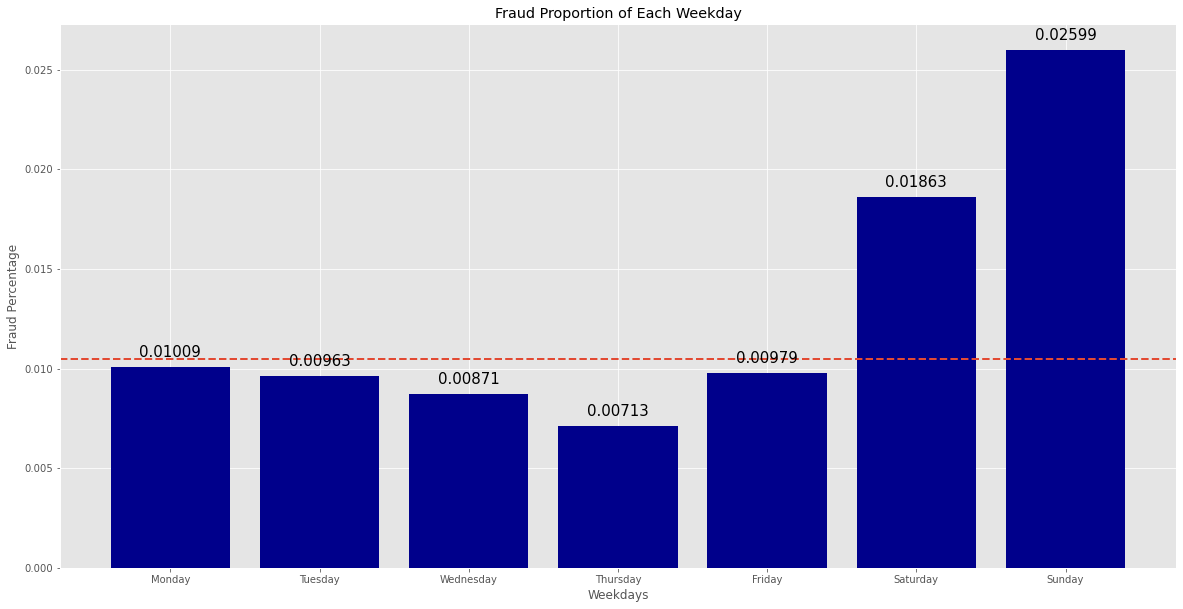

In [23]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (20, 10))
plt.bar(data = y_dow, x = y_dow.index, height = 'Fraud', color = 'darkblue')
ax.axhline(y = y_avg, ls = '--', lw = 2)

for i, v in enumerate(y_dow.index):
    ax.text(v, y_dow.iloc[i]['Fraud']+0.0005, round(y_dow.iloc[i]['Fraud'], 5),
            horizontalalignment = 'center', fontsize = 15)

plt.title('Fraud Proportion of Each Weekday')
plt.xlabel('Weekdays')
plt.ylabel('Fraud Percentage')
plt.show()

## Make New Entities

In [24]:
data['Cardnum'] = data['Cardnum'].astype('str')
data['card_merch'] = data.Cardnum + data.Merchnum
data['card_zip'] = data.Cardnum + data['Merch zip']
data['card_state'] = data.Cardnum + data['Merch state']
data['merch_zip'] = data.Merchnum + data['Merch zip']
data['merch_state'] = data.Merchnum + data['Merch state']

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  object        
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  object        
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
 10  dow                96397 non-null  object        
 11  dow_risk           96397 non-null  float64       
 12  card_merch         96397 non-null  object        
 13  card_zip           96397 non-null  object        
 14  card_s

In [26]:
attributes = list(data.iloc[:, np.r_[1,3,12:17]].columns)
attributes

['Cardnum',
 'Merchnum',
 'card_merch',
 'card_zip',
 'card_state',
 'merch_zip',
 'merch_state']

In [27]:
data1 = data.copy()
vars = data.copy()
data1['check_date'] = data1.Date
data1['check_record'] = data1.Recnum
vars.shape

(96397, 17)

## Days Since, Velocity, Amount Variables

In [28]:
from timeit import default_timer as timer
start = timer()
for entity in attributes:    
    try: print('Run time for the last entity ----------------- {}s'.format(timer() - st))
    except: print('')
    st = timer()    
    
    ## Day-since variables:   
    df_l = data1[['Recnum', 'Date', entity]]
    df_r = data1[['check_record', 'check_date', entity, 'Amount']]    
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)   
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']]\
                                                   .groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (temp1.Date - temp1.check_date).dt.days
    vars[entity + '_day_since'] = vars.Recnum.map(mapper)
    vars[entity + '_day_since'].fillna((vars.Date - pd.to_datetime('2006-01-01')).dt.days, inplace = True)
    print('\n' + entity + '_day_since ---> Done')   
    
    ## Frequency & Amount variables:   
    for time in [0,1,3,7,14,30]:       
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) &\
                       (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]       
        col_name = entity + '_count_' + str(time)    
        mapper2 = temp2.groupby('Recnum')[entity].count()      
        vars[col_name] = vars.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')       
        vars[entity + '_avg_' + str(time)] = vars.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        vars[entity + '_max_' + str(time)] = vars.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        vars[entity + '_med_' + str(time)] = vars.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        vars[entity + '_total_' + str(time)] = vars.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        vars[entity + '_actual/avg_' + str(time)] = vars['Amount'] / vars[entity + '_avg_' + str(time)]
        vars[entity + '_actual/max_' + str(time)] = vars['Amount'] / vars[entity + '_max_' + str(time)]
        vars[entity + '_actual/med_' + str(time)] = vars['Amount'] / vars[entity + '_med_' + str(time)]
        vars[entity + '_actual/toal_' + str(time)] = vars['Amount'] / vars[entity + '_total_' + str(time)]       
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')

print('Total run time: {}mins'.format((timer() - start)/60))



Cardnum_day_since ---> Done
Cardnum_count_0 ---> Done
Cardnum amount variables over past 0 ---> Done
Cardnum_count_1 ---> Done
Cardnum amount variables over past 1 ---> Done
Cardnum_count_3 ---> Done
Cardnum amount variables over past 3 ---> Done
Cardnum_count_7 ---> Done
Cardnum amount variables over past 7 ---> Done
Cardnum_count_14 ---> Done
Cardnum amount variables over past 14 ---> Done
Cardnum_count_30 ---> Done
Cardnum amount variables over past 30 ---> Done
Run time for the last entity ----------------- 12.276353196999992s

Merchnum_day_since ---> Done
Merchnum_count_0 ---> Done
Merchnum amount variables over past 0 ---> Done
Merchnum_count_1 ---> Done
Merchnum amount variables over past 1 ---> Done
Merchnum_count_3 ---> Done
Merchnum amount variables over past 3 ---> Done
Merchnum_count_7 ---> Done
Merchnum amount variables over past 7 ---> Done
Merchnum_count_14 ---> Done


/var/folders/j7/7149qgsn56gcxj_4hnlwh0bw0000gn/T/ipykernel_64244/2243731856.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[entity + '_total_' + str(time)] = vars.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/j7/7149qgsn56gcxj_4hnlwh0bw0000gn/T/ipykernel_64244/2243731856.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[entity + '_actual/avg_' + str(time)] = vars['Amount'] / vars[entity + '_avg_' + str(time)]
/var/folders/j7/7149qgsn56gcxj_4hnlwh0bw0000gn/T/ipykernel_64244/2243731856.py:32:

Merchnum amount variables over past 14 ---> Done


/var/folders/j7/7149qgsn56gcxj_4hnlwh0bw0000gn/T/ipykernel_64244/2243731856.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[col_name] = vars.Recnum.map(mapper2)


Merchnum_count_30 ---> Done


/var/folders/j7/7149qgsn56gcxj_4hnlwh0bw0000gn/T/ipykernel_64244/2243731856.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[entity + '_avg_' + str(time)] = vars.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/j7/7149qgsn56gcxj_4hnlwh0bw0000gn/T/ipykernel_64244/2243731856.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[entity + '_max_' + str(time)] = vars.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/j7/7149qgsn56gcxj_4hnlwh0bw0000gn/T/ipykernel_64244/2243731856.py:29: Pe

Merchnum amount variables over past 30 ---> Done
Run time for the last entity ----------------- 177.85761202900002s


/var/folders/j7/7149qgsn56gcxj_4hnlwh0bw0000gn/T/ipykernel_64244/2243731856.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[entity + '_day_since'] = vars.Recnum.map(mapper)



card_merch_day_since ---> Done
card_merch_count_0 ---> Done
card_merch amount variables over past 0 ---> Done
card_merch_count_1 ---> Done
card_merch amount variables over past 1 ---> Done
card_merch_count_3 ---> Done
card_merch amount variables over past 3 ---> Done
card_merch_count_7 ---> Done
card_merch amount variables over past 7 ---> Done
card_merch_count_14 ---> Done
card_merch amount variables over past 14 ---> Done
card_merch_count_30 ---> Done
card_merch amount variables over past 30 ---> Done
Run time for the last entity ----------------- 7.050736393999955s

card_zip_day_since ---> Done
card_zip_count_0 ---> Done
card_zip amount variables over past 0 ---> Done
card_zip_count_1 ---> Done
card_zip amount variables over past 1 ---> Done
card_zip_count_3 ---> Done
card_zip amount variables over past 3 ---> Done
card_zip_count_7 ---> Done
card_zip amount variables over past 7 ---> Done
card_zip_count_14 ---> Done
card_zip amount variables over past 14 ---> Done
card_zip_count_30

In [29]:
vars.shape

(96397, 402)

## Relative Velocity Variables

In [30]:
start = timer()
for ent in attributes:
    for d in ['0', '1']:
        for dd in ['3', '7', '14', '30']:
            vars[ent + '_count_' + d + '_by_' + dd] = vars[ent + '_count_' + d]/(vars[ent + '_count_' + dd]/float(dd))
            vars[ent + '_total_' + d + '_by_' + dd] = vars[ent + '_total_' + d]/(vars[ent + '_total_' + dd]/float(dd))
            
print(f'Total run time: {(timer() - start) / 60} min')

/var/folders/j7/7149qgsn56gcxj_4hnlwh0bw0000gn/T/ipykernel_64244/3199481618.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[ent + '_count_' + d + '_by_' + dd] = vars[ent + '_count_' + d]/(vars[ent + '_count_' + dd]/float(dd))
/var/folders/j7/7149qgsn56gcxj_4hnlwh0bw0000gn/T/ipykernel_64244/3199481618.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[ent + '_total_' + d + '_by_' + dd] = vars[ent + '_total_' + d]/(vars[ent + '_total_' + dd]/float(dd))


Total run time: 0.015665720116667597 min


In [31]:
vars.shape

(96397, 514)

In [32]:
vars.to_csv('vars.csv')

## Benford's Law Variables

In [33]:
cleaned_data = data[data['Merch description'].str.match(r'[Ff][Ee][Dd][Ed][Xx]') == False].copy()
cleaned_data['Amount'] = cleaned_data['Amount'].astype(str)

In [34]:
def n_low(df):
    return ((df['Amount'].str.extract(r'([1-9])') == '1') | (df['Amount'].str.extract(r'([1-9])') == '2')).sum()

In [35]:
cardnums = cleaned_data.groupby('Cardnum').apply(n_low)
cardnums['n'] = cleaned_data.groupby('Cardnum')['Amount'].count()
cardnums['n_low'] = cleaned_data.groupby('Cardnum').apply(n_low)
cardnums = cardnums[['n', 'n_low']]
cardnums['n_high'] = cardnums['n'] - cardnums['n_low']

In [36]:
cardnums['n_low'] = cardnums['n_low'].replace(0,1)
cardnums['n_high'] = cardnums['n_high'].replace(0,1)

In [37]:
cardnums['R'] = 1.096 * cardnums['n_low'] / cardnums['n_high']
cardnums['1/R'] = 1 / cardnums['R']
cardnums['U'] = cardnums[['R', '1/R']].max(axis = 1)

In [42]:
from math import e
cardnums['t'] = (cardnums['n'] - 15) / 3
cardnums['U*'] = 1 + ((cardnums['U'] - 1) / (1 + e**-cardnums['t']))

In [43]:
cardnums.sort_values('U*', ascending = False)[0:40].to_csv('Top 40 Cardnum.csv')

In [44]:
merchnums = cleaned_data.groupby('Merchnum').apply(n_low)
merchnums['n'] = cleaned_data.groupby('Merchnum')['Amount'].count()
merchnums['n_low'] = cleaned_data.groupby('Merchnum').apply(n_low)
merchnums = merchnums[['n', 'n_low']]
merchnums['n_high'] = merchnums['n'] - merchnums['n_low']

In [45]:
merchnums['n_low'] = merchnums['n_low'].replace(0,1)
merchnums['n_high'] = merchnums['n_high'].replace(0,1)

In [46]:
merchnums['R'] = 1.096 * merchnums['n_low'] / merchnums['n_high']
merchnums['1/R'] = 1 / merchnums['R']
merchnums['U'] = merchnums[['R', '1/R']].max(axis = 1)

In [47]:
merchnums['t'] = (merchnums['n'] - 15) / 3
merchnums['U*'] = 1 + ((merchnums['U'] - 1) / (1 + e**-merchnums['t']))

In [48]:
merchnums.sort_values('U*', ascending = False)[0:40].to_csv('Top 40 Merchnum.csv')